In [2]:
import numpy as np
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import init_notebook_mode, iplot

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


C:\Users\bhavy\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df[["Time", "Amount", "Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
fraud = df[df["Class"] == 1]
not_fraud = df[df["Class"] == 0]
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
print(fraud.shape)
print(not_fraud.shape)

(492, 31)
(284315, 31)


In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
not_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

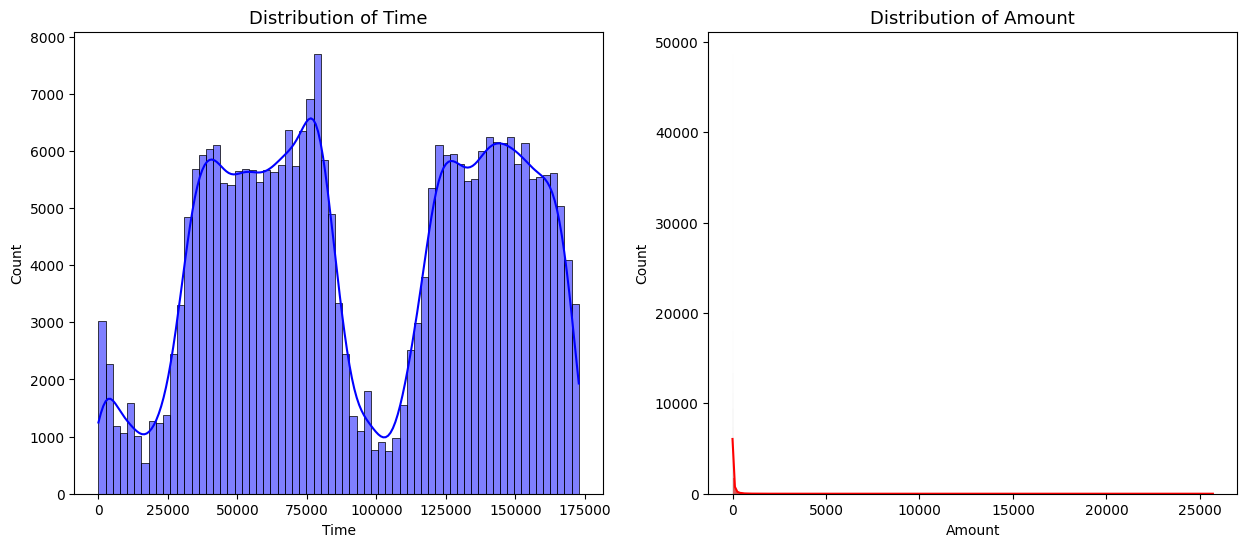

In [11]:
# Create subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Use histplot for distribution plots
sns.histplot(df['Time'], ax = ax1, color='b', kde = True)
sns.histplot(df['Amount'], ax = ax2, color='r', kde = True)

# Set titles for the subplots
ax1.set_title('Distribution of Time', fontsize = 13)
ax2.set_title('Distribution of Amount', fontsize = 13)

# Show the plots
plt.show()

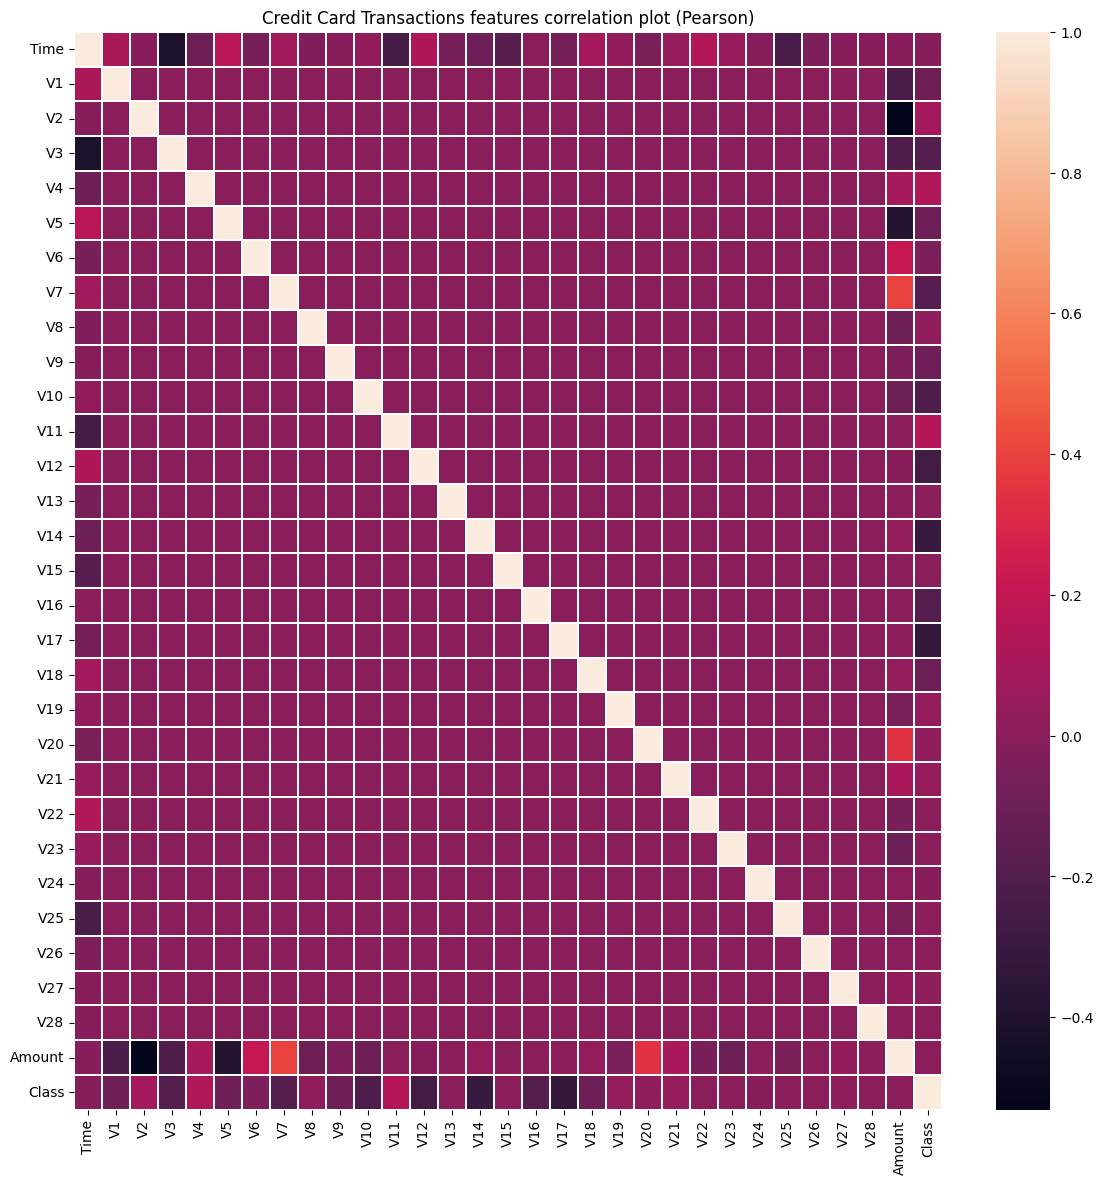

In [12]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1)
plt.show()

In [1]:
# Create a scatter plot for fraudulent transactions
trace = go.Scatter(
    x=fraud['Time'],
    y=fraud['Amount'],
    mode="markers",
    marker=dict(
        size=6,  # Adjust the size of the markers
        color='purple',  # Change marker color to red
        opacity=0.7,  # Adjust marker opacity
    ),
    text=fraud['Amount'],
    name="Amount"
)

data = [trace]

# Define the layout
layout = go.Layout(
    title='Amount of Fraudulent Transactions',
    xaxis=dict(title='Time [s]', showticklabels=True),
    yaxis=dict(title='Amount'),
    hovermode='closest'
)

fig = go.Figure(data=data, layout=layout)

# Show the plot
iplot(fig, filename='fraud-amount')


NameError: name 'go' is not defined

Non-fraud transactions: 99.83%
Fraud transactions: 0.17%


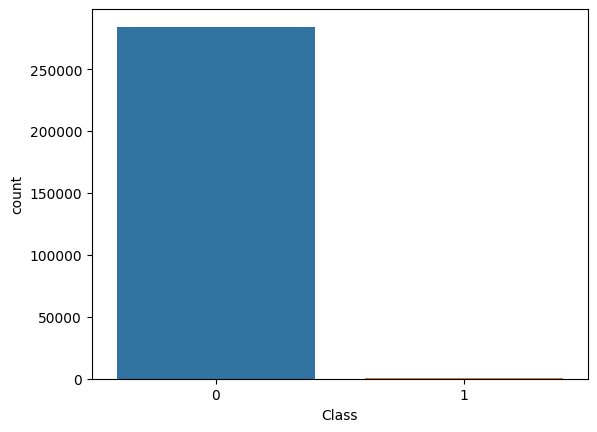

In [14]:
sns.countplot(x='Class', data=df)
print('Non-fraud transactions: {}%'.format(round(df.Class.value_counts()[0]/len(df)*100.0,2)))
print('Fraud transactions: {}%'.format(round(df.Class.value_counts()[1]/len(df)*100.0,2)))

In [15]:
x = df.drop(["Class"], axis = 1)
y = df["Class"]

In [16]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(x, y)

In [17]:
print(x_nm.shape, y_nm.shape)

(984, 30) (984,)


In [18]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x_nm)

In [19]:
# Splitting the dataset into train and test 
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_nm, test_size = 0.25)

In [20]:
acc = []
# Define a function to evaluate a model
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    
    accuracy = model.score(x_test, y_test)
    print("Accuracy: {}".format(accuracy))
    
    cv_scores = cross_val_score(model, x_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    print("Cross Val Score: {}".format(mean_cv_score))
    acc.append(accuracy)

# Define a function to print the confusion matrix
def plot_confusion_matrix(model, x_test, y_test):
    # Make predictions using the model
    y_pred = model.predict(x_test)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a heatmap of the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

Accuracy: 0.943089430894309
Cross Val Score: 0.9661059018201875


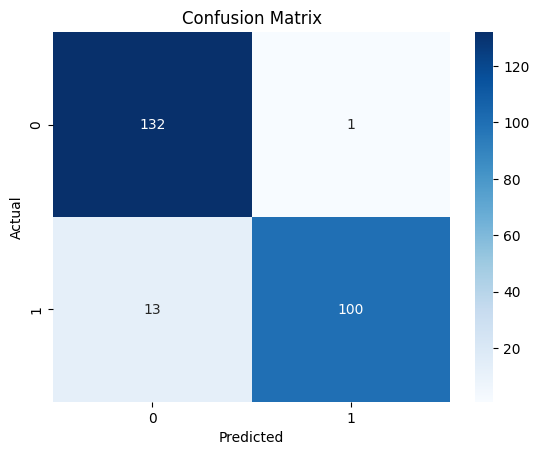

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
evaluate_model(clf, x_train, y_train, x_test, y_test)

plot_confusion_matrix(clf, x_test, y_test)

Accuracy: 0.9024390243902439
Cross Val Score: 0.9376447876447876


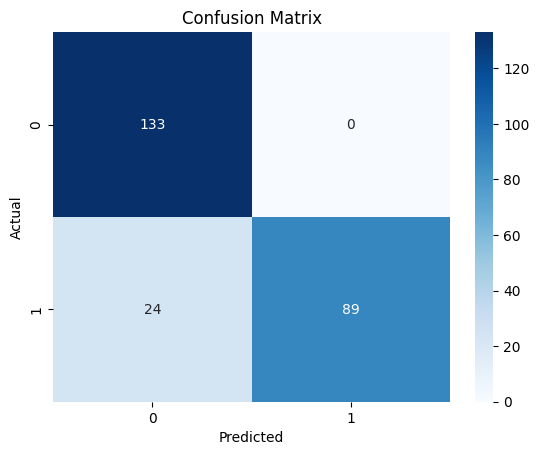

In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
evaluate_model(clf, x_train, y_train, x_test, y_test)

plot_confusion_matrix(clf, x_test, y_test)

Accuracy: 0.9471544715447154
Cross Val Score: 0.9674756389042104


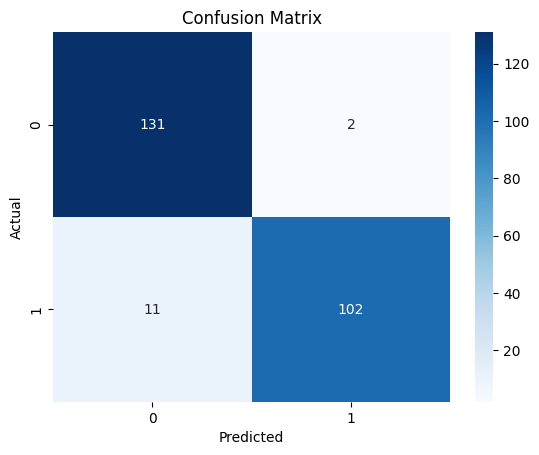

In [23]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
evaluate_model(clf, x_train, y_train, x_test, y_test)

plot_confusion_matrix(clf, x_test, y_test)

Accuracy: 0.9552845528455285
Cross Val Score: 0.9674756389042102


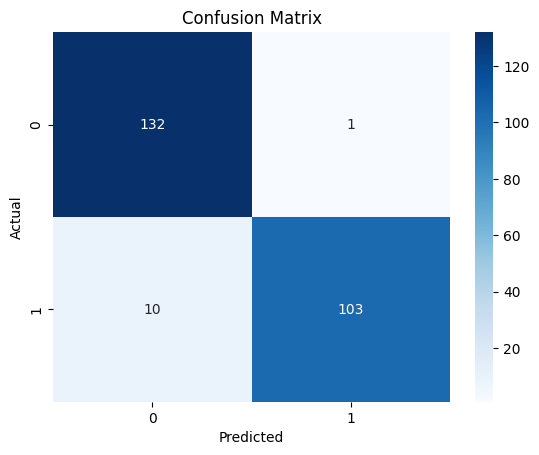

In [24]:
from xgboost import XGBClassifier
clf = XGBClassifier()
evaluate_model(clf, x_train, y_train, x_test, y_test)

plot_confusion_matrix(clf, x_test, y_test)

In [25]:
#Get all the columns from the dataframe
columns = df.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
target = "Class"

# Define a random state 
state = np.random.RandomState(45)
X = df[columns]
Y = df[target]

# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [26]:
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")

# Create the Isolation Forest model
clf = IsolationForest(n_estimators=100, max_samples=len(X), contamination = len(fraud)/float(len(not_fraud)), random_state=state, verbose=0,)

# Fit the model to the data
clf.fit(X)

# Predict anomalies
y_pred = clf.predict(X)

# Reshape the prediction values to 0 for Valid transactions, 1 for Fraud transactions
y_pred = [1 if x == -1 else 0 for x in y_pred]

# Calculate the number of errors
n_errors = (y_pred != Y).sum()

# Calculate accuracy and print classification report
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(Y, y_pred)
acc.append(accuracy)
report = classification_report(Y, y_pred)

# Print the results
print(f"Isolation Forest: {n_errors}")
print(f"Accuracy Score: {accuracy}")
print("Classification Report:")
print(report)


Isolation Forest: 667
Accuracy Score: 0.9976580631796269
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.32      0.32      0.32       492

    accuracy                           1.00    284807
   macro avg       0.66      0.66      0.66    284807
weighted avg       1.00      1.00      1.00    284807



In [27]:
models = ["RandomForestClassifier", "KNeighborsClassifier", "AdaBoostClassifier", "XGBClassifier", "IsolationForest"]
acc_percentages = [f"{score * 100:.2f}%" for score in acc]
acc_percentages

['94.31%', '90.24%', '94.72%', '95.53%', '99.77%']

In [28]:
acc_scores = {"Model": models, "Accuracy Score": acc_percentages}
score_df = pd.DataFrame(acc_scores)
score_df

,Model,Accuracy Score
0,RandomForestClassifier,94.31%
1,KNeighborsClassifier,90.24%
2,AdaBoostClassifier,94.72%
3,XGBClassifier,95.53%
4,IsolationForest,99.77%
